Install pytesseract and its Odia library for image processing




In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

!apt-get install tesseract-ocr-ori

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,066 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

 Installing pdf related library

In [3]:
!pip install PyMuPDF
!pip install fpdf
!pip install PyPDF2


     |████████████████████████████████| 8.7 MB 5.1 MB/s 
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40725 sha256=8d0edc7bbcff5ae8cca44a785217231914ee9cef53555f8756d866fbf5da0b1a
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf
     |████████████████████████████████| 77 kB 2.8 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=a996f743319dffab9f9195aa478eca95ef4791d2ba62b5116430ddaf1f4b9ddf
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


Installing Google translator

In [4]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 9.9 MB/s 
     |████████████████████████████████| 42 kB 902 kB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 65 kB 2.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=0e5738fd05a5b7833eba0b6254d71ca35d1bc4d415888e344d6627476d318856
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


Upload the required pdf

In [5]:
from google.colab import files

uploaded = files.upload()

Saving Calveria_and_Dodo_Story_In_Odia.pdf to Calveria_and_Dodo_Story_In_Odia.pdf


Import library

In [6]:
import pytesseract
import shutil
import os
import random

import fitz

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

import subprocess

import glob

from googletrans import Translator

from fpdf import FPDF

from PyPDF2 import PdfFileWriter, PdfFileReader
import io



Separate each page for analysis and conversion

In [7]:
fname = 'Calveria_and_Dodo_Story_In_Odia.pdf'  
doc = fitz.open(fname)
for i in range(len(doc)):
    for img in doc.getPageImageList(i):
        xref = img[0]  # check if this xref was handled already?
        pix = fitz.Pixmap(doc, xref)
        if pix.n < 5:  # this is GRAY or RGB
            pix.writePNG("p%s.png" % (i))
        else:  # CMYK needs to be converted to RGB first
            pix1 = fitz.Pixmap(fitz.csRGB, pix)  # make RGB pixmap copy
            pix1.writePNG("p%s.png" % (i))
            pix1 = None  # release storage early (optional)
        pix = None  # release storage early (optional)

Deprecation: 'getPageImageList' removed from class 'Document' after v1.19 - use 'get_page_images'.
Deprecation: 'writePNG' removed from class 'Pixmap' after v1.19 - use 'save'.


Analyze each page image

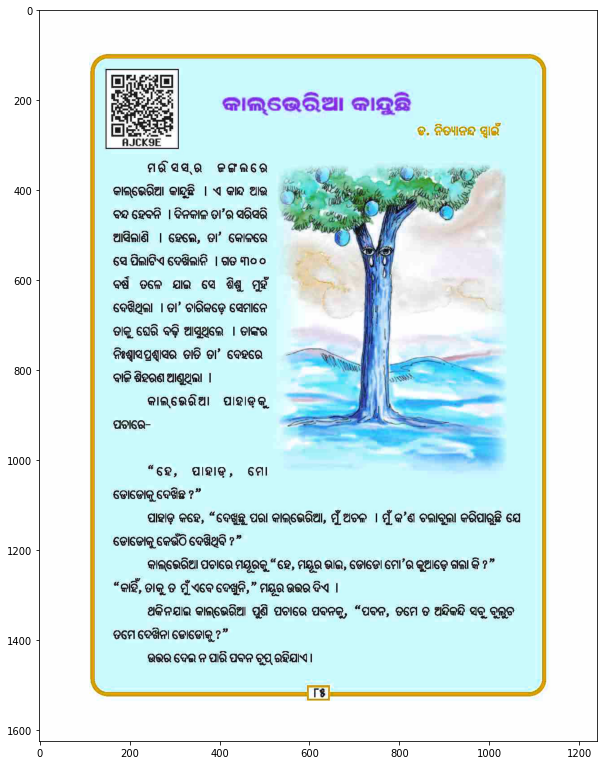

In [8]:
pagename = 'p0'
image = cv2.imread(pagename+'.png')
plt.figure(figsize=(10,15))
plt.imshow(image, cmap='gray')

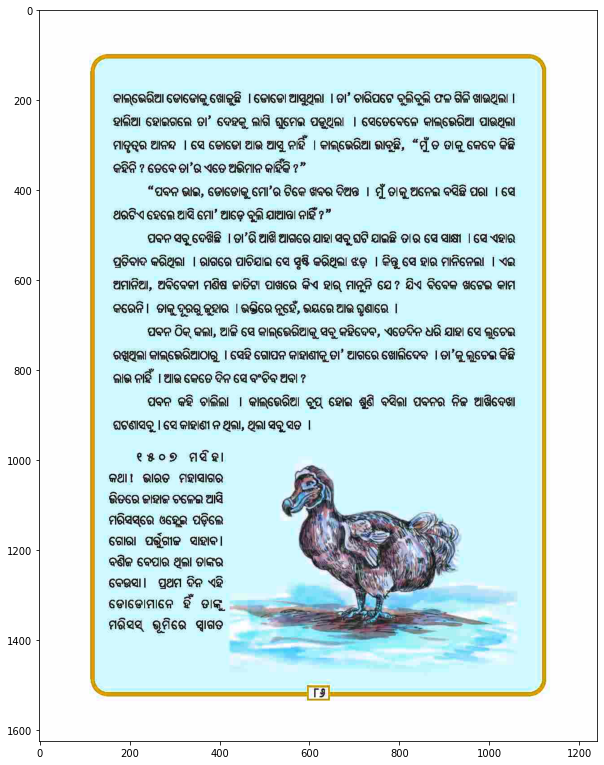

In [9]:
pagename = 'p1'
image = cv2.imread(pagename+'.png')
plt.figure(figsize=(10,15))
plt.imshow(image, cmap='gray')

Crop text part from image and pictures separately

1241 1625


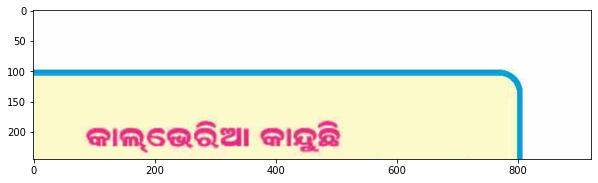

In [10]:
im = Image.open('p0'+'.png')
w, h= im.size
print(w, h)

#Heading
l=320
t=0
r=w
b=h-1380

im=im.crop((l, t, r, b))
im.show()
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')

1241 1625


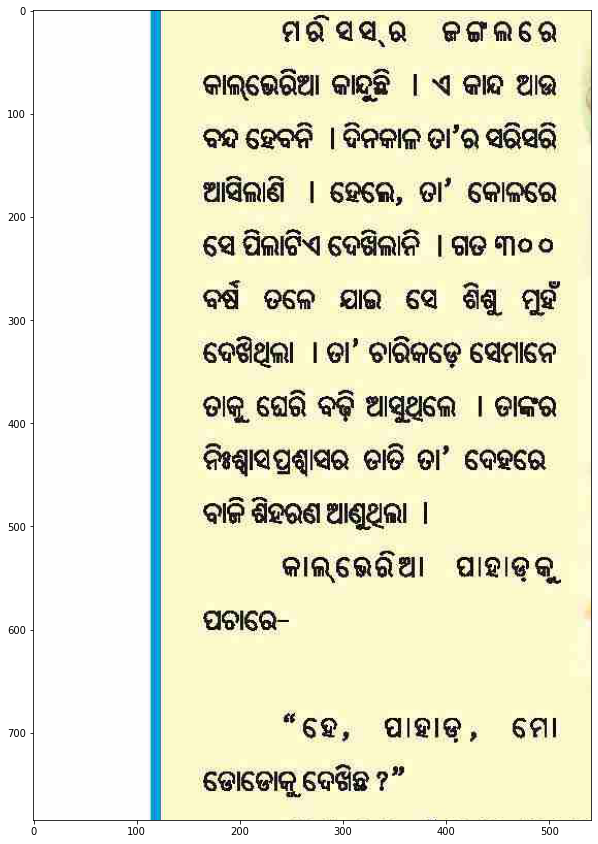

In [11]:
im = Image.open('p0'+'.png')
w, h= im.size
print(w, h)

#First para
l=0
t=330
r=w-700
b=h-510

im=im.crop((l, t, r, b))
im.show()
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')

1241 1625


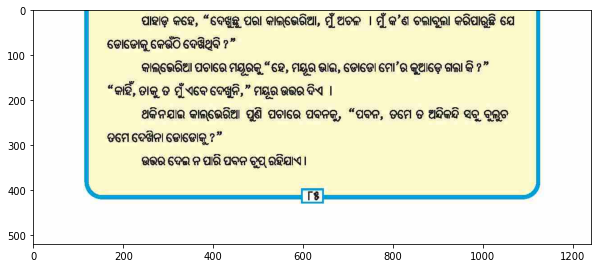

In [12]:
im = Image.open('p0'+'.png')
w, h= im.size
print(w, h)

#Second para
l=0
t=h-520
r=w
b=h

im=im.crop((l, t, r, b))
im.show()
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')

1241 1625


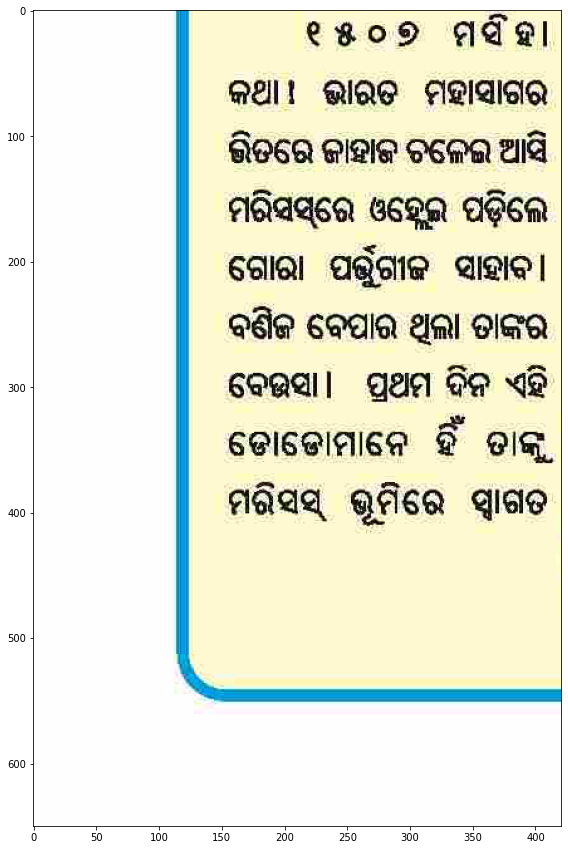

In [13]:
im = Image.open('p1'+'.png')
w, h= im.size
print(w, h)
l=0
t=h-650
r=w-820
b=h
im=im.crop((l, t, r, b))
im.show()
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')

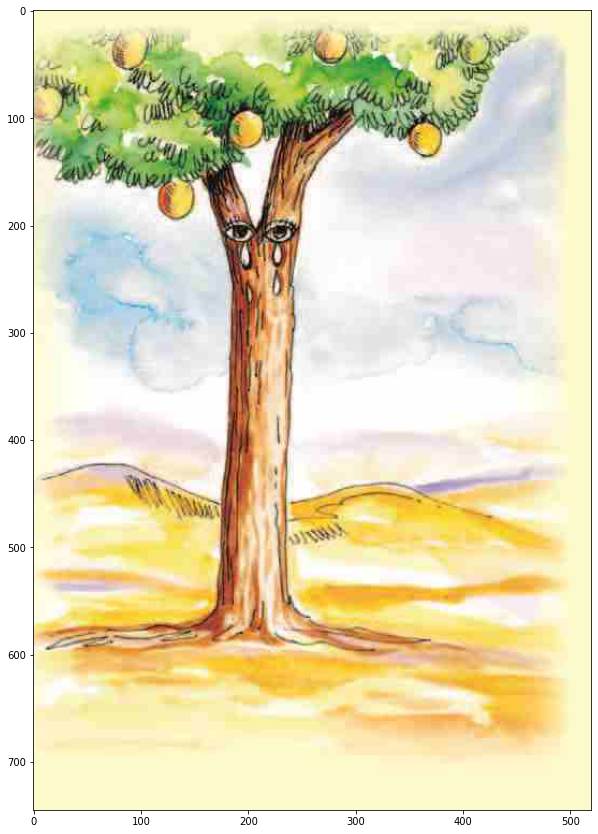

In [14]:
im = Image.open('p0'+'.png')

#Calveria pic
l=w-700
t=330
r=w-180
b=h-550
im=im.crop((l, t, r, b))
im.show()
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')
im.save('kalveria'+'.png')

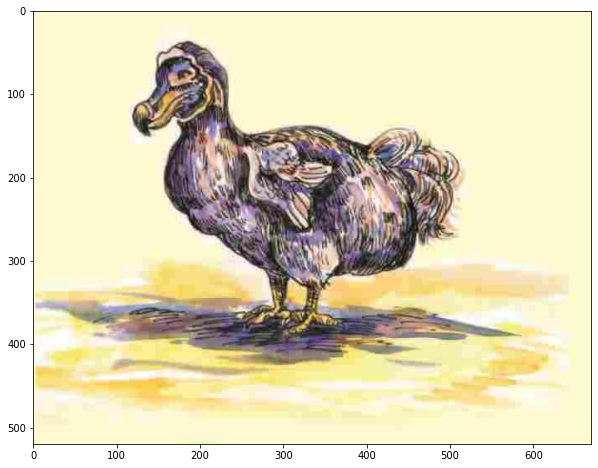

In [15]:
im = Image.open('p1'+'.png')

#Dodo image
l=w-820
t=h-650
r=w-150
b=h-130
im=im.crop((l, t, r, b))
im.show()
plt.figure(figsize=(10,15))
plt.imshow(im, cmap='gray')
im.save('dodo'+'.png')

In [16]:
im = Image.open('p0'+'.png')

#Heading
l=320
t=0
r=w
b=h-1380
im.crop((l, t, r, b)).save('p0_1'+'.png')

#First para
l=0
t=330
r=w-700
b=h-510
im.crop((l, t, r, b)).save('p0_2'+'.png')

#Second para
l=0
t=h-520
r=w
b=h
im.crop((l, t, r, b)).save('p0_3'+'.png')

im = Image.open('p1'+'.png')

#First para
l=0
t=0
r=w
b=h-650
im.crop((l, t, r, b)).save('p1_1'+'.png')

#Second para
l=0
t=h-650
r=w-820
b=h
im.crop((l, t, r, b)).save('p1_2'+'.png')

Extract odia text from image

In [17]:
image_files = glob.glob('*.png')

num_pages = len(image_files)
for i in [ '0_2', '0_3', '1_1', '1_2', '2', '3' ]:  #Heading image not added, so p0_1.png is not added in loop
  print(i)
  infilename = 'p'+str(i)+'.png'
  outfilename = 'p'+str(i)
  print(infilename)
  output = subprocess.Popen("tesseract "+infilename+" "+outfilename+" -l ori --psm 6",
                                    shell = True,
                                    stdout = subprocess.PIPE
      ).stdout.read()

0_2
p0_2.png
0_3
p0_3.png
1_1
p1_1.png
1_2
p1_2.png
2
p2.png
3
p3.png


In [18]:
num_pages = len(glob.glob('p*.txt'))
num_pages

6

write all the extracted odia texts into a file

In [19]:
oname = fname.replace('.pdf','_text.txt')
o=open(oname, 'w', encoding='utf-8')
txts = ['p'+str(i)+'.txt' for i in ['0_2', '0_3', '1_1', '1_2', '2', '3' ]]
for f in txts:
  text = open(f, encoding='utf-8').read()
  o.write('         '+str(f).replace('.txt','')+'   \n')
  o.write(text)
  o.write('\n')

In [20]:
files.download(oname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Translate odia text to English and store it in a file

In [23]:
translater = Translator() 

oname = fname.replace('.pdf','_eng_text.txt')
o=open(oname, 'w', encoding='utf-8')
txts = ['p'+str(i)+'.txt' for i in ['0_2', '0_3', '1_1', '1_2', '2', '3' ]]
for f in txts:
  text = open(f, encoding='utf-8').read()
  out = translater.translate(text, src="or", dest="en") 
  print(out.text) 
  o.write(out.text)
  o.write('\n')

In the forest of March
Callaveria is crying. It's crying again
It will not stop. The day is over
Has arrived However, in her arms
She did not see a child. The last 300
Going down the years, she's a baby face
I saw it. They are all around her
He was surrounded by people. His
The heat of breathing is in your body
The bet was shaking.

Kallu Veria hills
Ask-

"Oh, the mountain, my
Have you seen Dodo? ”
The mountain says, "I see Para Calveria, I'm immobile." What can I do to help?
Where have you seen Dodo? ”

"Hey, peacock brother, where did my Dodo go?" ”
"Why, I haven't seen him yet," the peacock replies

Tired, Calveria asked the wind again, "Wind, you're all in the dust."
Didn't you see Dodo? ”

Unable to answer, the wind remained silent.
Callaveria is looking for Dodo. Dodo was coming. She was walking around eating and eating fruit
"She was released this morning; she's talked to her father and she's fine. At that time, Calvary was getting it
The joy of motherhood. "She is OK. "I've ne

In [24]:
files.download(oname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Create a new pdf and add the english content into it.

In [29]:
title = 'Callaveria is crying'

class PDF(FPDF):
    def header(self):
        # Arial bold 15
        self.set_font('Arial', 'B', 15)
        # Calculate width of title and position
        w = self.get_string_width(title) + 6
        self.set_x((210 - w) / 2)
        # Colors of frame, background and text
        self.set_draw_color(0, 80, 180)
        self.set_fill_color(230, 230, 0)
        self.set_text_color(220, 50, 50)
        # Thickness of frame (1 mm)
        self.set_line_width(1)
        # Title
        self.cell(w, 9, title, 1, 1, 'C', 1)
        # Line break
        self.ln(10)

    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-15)
        # Arial italic 8
        self.set_font('Arial', 'I', 8)
        # Text color in gray
        self.set_text_color(128)
        # Page number
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

    def chapter_title(self, num, label):
        # Arial 12
        self.set_font('Arial', '', 12)
        # Background color
        self.set_fill_color(200, 220, 255)
        # Title
        self.cell(0, 6, 'Chapter %d : %s' % (num, label), 0, 1, 'L', 1)
        # Line break
        self.ln(4)

    def chapter_body(self, name):
        # Read text file
        with open(name, 'rb') as fh:
            txt = fh.read().decode('latin-1')
        # Times 12
        self.set_font('Arial', '', 12)
        # Output justified text
        self.multi_cell(0, 5, txt)
        # Line break
        self.ln()

    def print_chapter(self, num, title, name):
        self.add_page()
        self.chapter_title(num, title)
        self.chapter_body(name)

pdf = PDF()
pdf.set_title(title)
#pdf.set_author('Rabi')
pdf.print_chapter(1, 'Calveria & Dodo', 'Calveria_and_Dodo_Story_In_Odia_eng_text.txt')
pdf.output('Calveria_and_Dodo_in_eng.pdf', 'F')

''

Add image into pdf

In [30]:
doc=fitz.open("Calveria_and_Dodo_in_eng.pdf")
rect_for_calveria=fitz.Rect(130,100,580,320)
rect_for_dodo=fitz.Rect(190,130,320,210)
pg=1
for page in doc:
  if pg==1:
    page.insert_image(rect_for_calveria, filename="/content/kalveria.png")
    pg=pg+1
  elif pg==2:
    page.insert_image(rect_for_dodo, filename="/content/dodo.png")
    pg=pg+1
  else:
    pg=pg+1

doc.saveIncr()


In [27]:
files.download('Calveria_and_Dodo_in_eng.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>